first, let's import the packages needed

Trabalho Reservas de Hotel

Grupo:

Pedro Sousa

Pedro Silva

Rodolfo Diogo

Dilan Vera Cruz


In [353]:
#Imports

#Dependencias
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.colors as mcolors

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report


from sklearn.linear_model import SGDClassifier
import sort_dataframeby_monthorweek as sd

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB


ModuleNotFoundError: No module named 'sort_dataframeby_monthorweek'

In [248]:
#!pip install -U imbalanced-learn

In [354]:
#!pip install sort-dataframeby-monthorweek==0.1

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.1-py3-none-any.whl size=2621 sha256=06c28259387ffdedd6f3a6c307c46870218d5468d15bcd71d2fe2d9c68ab14dd
  Stored in directory: c:\users\quims\appdata\local\pip\cache\wheels\47\cb\85\55e340897a10875c8cd0292aba4dfdeb8a71bf8137ac886ce7
Successfully built sort-dataframeby-monthorweek
Note: you may need to restart the kernel to use updated packages.


In [249]:
sns.__version__

'0.12.0'

Importing the Dataset

In [250]:
df = pd.read_csv("hotel_bookings_HW_v2.csv")

# DATA UNDERSTANDING

-Tipos de variaveis (Qualitativa/Quantitativa) - ordinal, nominal, continua ou discreta.
-médias das variaveis
-modas
-medianas
-compreensão Geral do dataset

In [251]:
df

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,NaN,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0.0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0.0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0.0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0.0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0.0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0.0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0.0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0.0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [252]:
#descrever tipo de data

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, len(df), 
    df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
    df.nunique(), list(df.drop_duplicates().sample(2, replace=True).values)])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)

df_items_info.sort_values(by=['Data Type']).reset_index(drop=True)

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,Unnamed: 0,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[11039, Resort Hotel, 1.0, 98, 2017, April, 1..."
1,previous_bookings_not_canceled,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[26081, Resort Hotel, nan, 49, 2016, July, 30..."
2,previous_cancellations,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[101489, City Hotel, 0.0, 56, 2016, November,..."
3,is_repeated_guest,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[8993, Resort Hotel, 1.0, 178, 2016, October,..."
4,days_in_waiting_list,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[65008, City Hotel, 1.0, 6, 2017, March, 12, ..."
5,babies,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[105012, City Hotel, 0.0, 78, 2017, January, ..."
6,adults,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[23125, Resort Hotel, nan, 121, 2016, April, ..."
7,stays_in_week_nights,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[10565, Resort Hotel, 1.0, 144, 2017, March, ..."
8,booking_changes,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[26523, Resort Hotel, 0.0, 188, 2016, July, 3..."
9,arrival_date_day_of_month,int64,119390,0,0.00,Unnamed: 0 119390 hotel...,"[[40881, City Hotel, 0.0, 16, 2015, August, 32..."


In [253]:
df.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,109839.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370615,104.011416,2016.157224,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221786,86.693382,189.266735,2.321149,101.831122,0.062518,0.571656
std,34465.068657,0.482972,106.863097,0.716504,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.672076,110.774548,131.655015,17.594721,50.535790,0.245291,0.796461
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2037.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,44.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,22.000000


In [254]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     109839 non-null  float64
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [255]:
df.iloc[:5,:15]

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country
0,0,Resort Hotel,NaN,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT
1,1,Resort Hotel,0.0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT
2,2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR
3,3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR
4,4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR


In [256]:
df.iloc[:5,15:]

,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [257]:
#observar valores da coluna das reservas canceladas
df.is_canceled.unique()

array([nan,  0.,  1.])

In [258]:
#observar valores da coluna das reservas canceladas
df.is_canceled.value_counts()

0.0    69131
1.0    40708
Name: is_canceled, dtype: int64

In [259]:
df.isnull().sum()

Unnamed: 0                             0
hotel                                  0
is_canceled                         9551
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

# DATA PREPARATION

-Distribuição

-Eliminar valores

-Substituir valores 

-Outliers - eliminar caso necessário

-Visualizar tendencias e correlações

-Descaracterização

-Selecionar as melhores variaveis 

In [260]:
#NULOS

In [261]:
#eliminar a coluna company, pois é nula quase em todo o dataset

df = df.drop(['company'], axis=1)

In [262]:
df = df.drop(['Unnamed: 0'], axis=1)

In [263]:
df.isnull().sum()

hotel                                 0
is_canceled                        9551
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [264]:
#percentagem de valores nulos da coluna agente
(df.agent.isnull().sum()/119390)*100

13.686238378423655

In [265]:
#eliminar os valores nulos de agent pois representam menos de 20%
df.dropna(subset=['agent'], inplace = True)

In [266]:
df.isnull().sum()

hotel                                0
is_canceled                       8251
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             2
babies                               0
meal                                 0
country                            154
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                                0
days_in_waiting_list                 0
customer_type            

In [267]:
#eliminar os valores nulos de country, e children, têm uma representação minima no nosso dataset
df.dropna(subset=['country','children' ], inplace = True)

 
#ficamos com 94662 registos no dataset, representa 86% do dataset inicial
len(df.index)/119390

0.8618309741184353

#Distribuição

C:\Users\Quims\AppData\Local\Temp\ipykernel_15276\1393987990.py:7: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>],
       [<AxesSubplot:title={'center':'adr'}>,
    

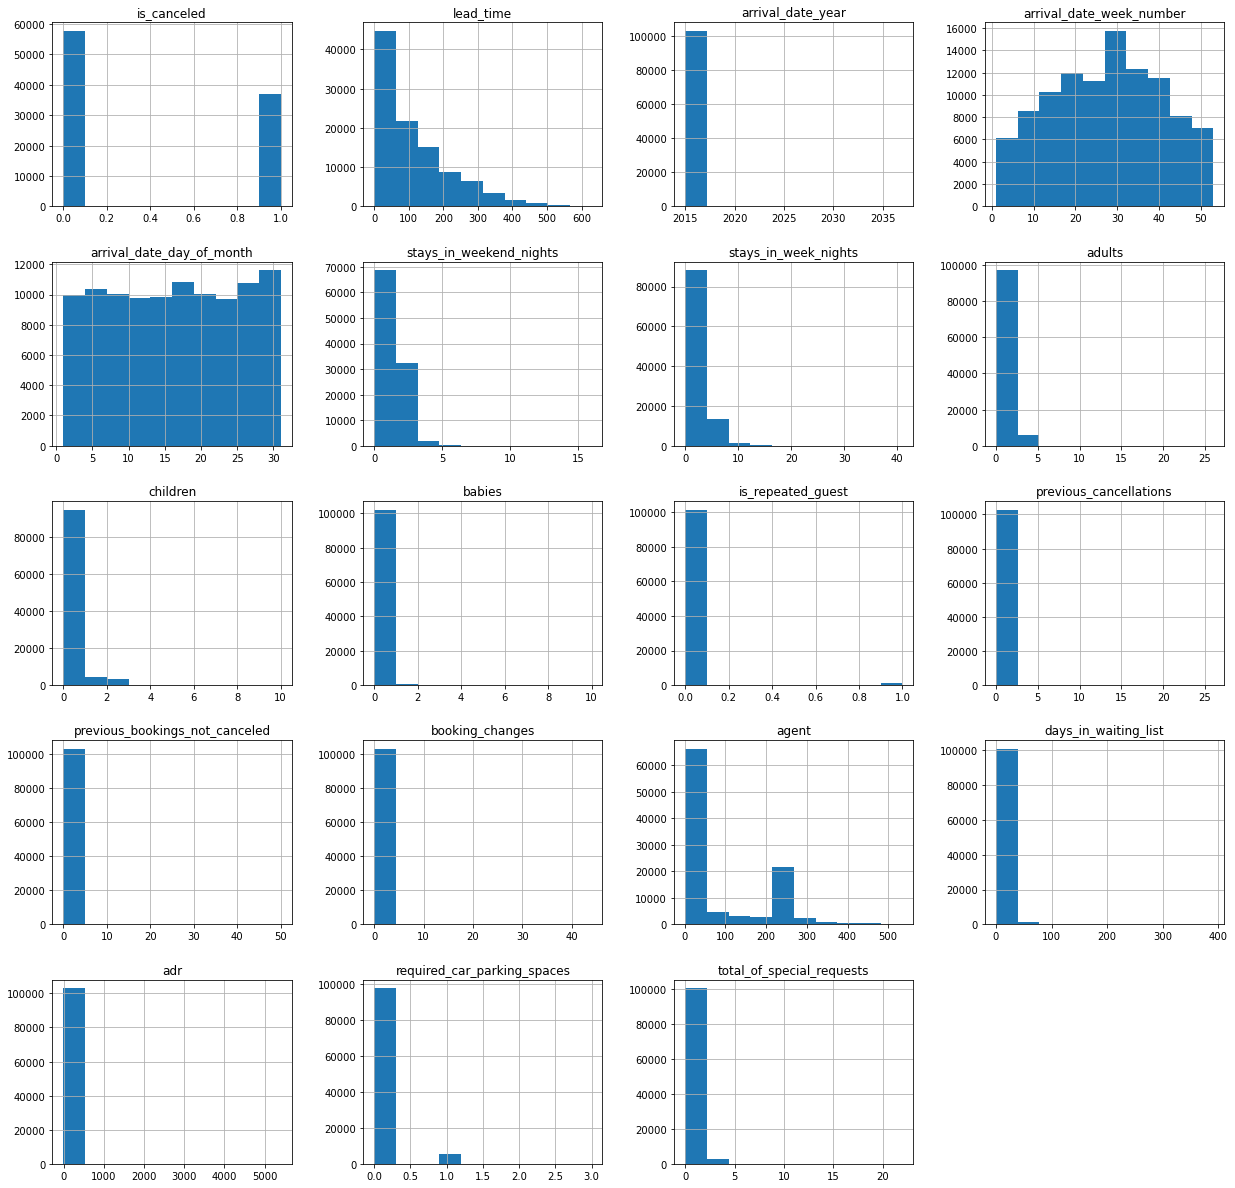

In [268]:
#Visualizar multiplas colunas e a sua distribuição



fig = plt.figure(figsize = (21,21))
ax = fig.gca()
df.hist(ax = ax)

#Substituir Valores

#substituir valores nulos na coluna is_canceled

In [269]:
#nr Reservas cumpridas
Cumpridas = df[df.is_canceled == 0].value_counts().sum()


#nr Reservas canceladas
Canceladas = df[df.is_canceled == 1].value_counts().sum()

Total = len(df.index)

print(f'Reservas Cumpridas: {Cumpridas} | {round(Cumpridas/Total*100,2)}%\nReservas Canceladas: {Canceladas} | {round(Canceladas/Total*100,2)}% \nTotal: {Total}')

Reservas Cumpridas: 57684 | 56.06%
Reservas Canceladas: 36976 | 35.94% 
Total: 102894


In [270]:
df.reservation_status.value_counts()

Check-Out    62733
Canceled     39158
No-Show       1003
Name: reservation_status, dtype: int64

In [271]:
#Reservas caceladas 
Canceladas = df[df.is_canceled == 1].value_counts().sum()
Canceladas

36976

In [272]:
#Reservas efetuadas
Cumpridas = df[df.is_canceled == 0].value_counts().sum()
Cumpridas

57684

In [273]:
#substituir os valores nulos no iscanceled, utilizando a coluna status com resultado Check-Out

for index, row in df.iterrows():
    if pd.isna(row['is_canceled']):
        if row.reservation_status == 'Check-Out':
            value = 0          
        else:
            value = 1   
        df['is_canceled'][index] = value

C:\Users\Quims\AppData\Local\Temp\ipykernel_15276\1744303253.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [274]:
df.reservation_status.value_counts()

Check-Out    62733
Canceled     39158
No-Show       1003
Name: reservation_status, dtype: int64

#OUTLIERS

-Detetar outliers 

-Eliminar os outliers

In [275]:
# coluna adr não pode ter valores negativos
df = df[df.adr > 0 ]

In [276]:
#Observar outliers date_year
df.arrival_date_year.value_counts()

2016    48584
2017    34811
2015    18487
2035        1
2037        1
2036        1
Name: arrival_date_year, dtype: int64

In [277]:
#eliminar outlier date_year
df = df[df.arrival_date_year <= 2017]

In [278]:
df.arrival_date_year.value_counts()

2016    48584
2017    34811
2015    18487
Name: arrival_date_year, dtype: int64

In [279]:
#Distribuição required_car_parking_spaces
df.required_car_parking_spaces.value_counts()

0    96473
1     5386
2       20
3        3
Name: required_car_parking_spaces, dtype: int64

In [280]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='required_car_parking_spaces'>

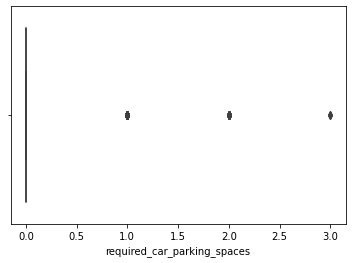

In [281]:
#distribuição car_parking_spaces
ax1 = fig.add_subplot()
sns.boxplot(x=df["required_car_parking_spaces"])

In [282]:
#eliminar outliers em required_car_parking_spaces
df = df[df.required_car_parking_spaces <2]

In [283]:
#Distribuição total_of_special_requests
df.total_of_special_requests.value_counts()

0     57297
1     30175
2     11871
3      2215
4       270
5        29
16        1
22        1
Name: total_of_special_requests, dtype: int64

<AxesSubplot:xlabel='total_of_special_requests'>

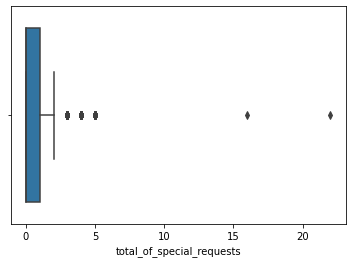

In [284]:
#Distribuição total_of_special_requests
ax1 = fig.add_subplot()
sns.boxplot(x=df["total_of_special_requests"])

In [285]:
#eliminar outliers em total_of_special_requests
df = df[df.total_of_special_requests <4]

In [286]:
#Distribuição babies
df.babies.value_counts()

0     100812
1        734
2         10
10         1
9          1
Name: babies, dtype: int64

<AxesSubplot:xlabel='babies'>

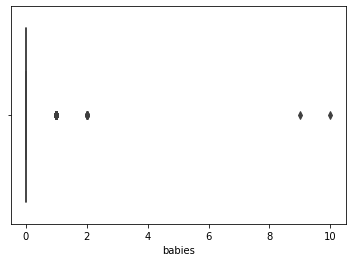

In [287]:
#Distribuição babies
ax1 = fig.add_subplot()
sns.boxplot(x=df["babies"])

In [288]:
#eliminar outliers em babies
df = df[df.babies <8]

In [289]:
#Distribuição children
df.children.value_counts()

0.0     93764
1.0      4348
2.0      3385
3.0        58
10.0        1
Name: children, dtype: int64

<AxesSubplot:xlabel='children'>

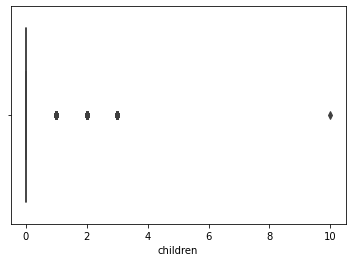

In [290]:
#Distribuição children
ax1 = fig.add_subplot()
sns.boxplot(x=df["children"])

In [291]:
#eliminar outliers em children
df = df[df.children <3]

In [292]:
#Distribuição adults
df.adults.value_counts()

2    80309
1    15178
3     5737
0      224
4       49
Name: adults, dtype: int64

In [293]:
df[df.adults == 4].is_canceled.value_counts()

0.0    36
1.0    13
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='adults'>

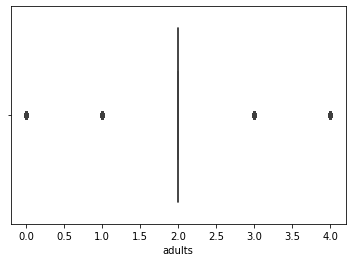

In [294]:
#Distribuição adults
ax1 = fig.add_subplot()
sns.boxplot(x=df["adults"])

In [295]:
#Eliminar adultos com valor 0
df = df[df.adults > 0]

In [296]:
#Distribuição previous_bookings_not_canceled
df.previous_bookings_not_canceled.value_counts()

0     100355
1        574
2        135
3         52
4         39
5         34
6         19
7          9
10         8
8          7
9          7
22         4
12         4
16         3
13         3
14         3
11         3
17         2
19         2
20         2
21         2
18         1
23         1
24         1
25         1
50         1
15         1
Name: previous_bookings_not_canceled, dtype: int64

<AxesSubplot:xlabel='previous_bookings_not_canceled'>

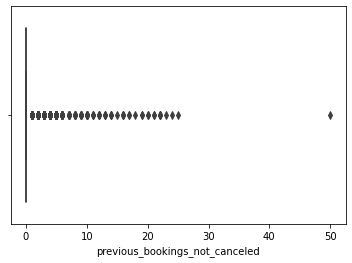

In [297]:
#Distribuição previous_bookings_not_canceled
ax1 = fig.add_subplot()
sns.boxplot(x=df["previous_bookings_not_canceled"])

In [298]:
#eliminar outliers em previous_bookings_not_canceled
df = df[df.previous_bookings_not_canceled <20]

In [299]:
#Distribuição previous_cancellations
df.previous_cancellations.value_counts()

0     95750
1      5352
2        30
26       26
25       25
24       24
11       20
14       14
3         9
6         6
13        4
21        1
Name: previous_cancellations, dtype: int64

<AxesSubplot:xlabel='previous_cancellations'>

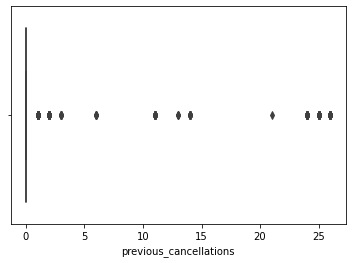

In [300]:
#Distribuição previous_cancellations
ax1 = fig.add_subplot()
sns.boxplot(x=df["previous_cancellations"])

In [301]:
#Distribuição booking_changes
df.booking_changes.value_counts()

0     87472
1      9709
2      2950
3       666
4       275
5        76
6        51
7        22
8        11
9         7
10        5
13        4
15        3
16        2
14        2
44        1
35        1
12        1
17        1
18        1
11        1
Name: booking_changes, dtype: int64

<AxesSubplot:xlabel='booking_changes'>

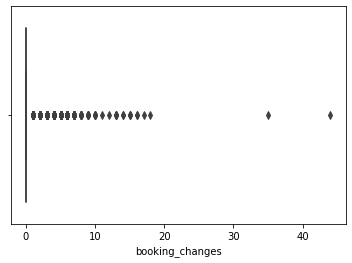

In [302]:
#Distribuição booking_changes
ax1 = fig.add_subplot()
sns.boxplot(x=df["booking_changes"])

In [303]:
#Distribuição is_repeated_guest
df.is_repeated_guest.value_counts()

0    100075
1      1186
Name: is_repeated_guest, dtype: int64

<AxesSubplot:xlabel='is_repeated_guest'>

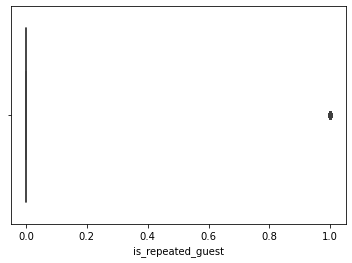

In [304]:
#Distribuição is_repeated_guest
ax1 = fig.add_subplot()
sns.boxplot(x=df["is_repeated_guest"])

In [305]:
#Distribuição days_in_waiting_list
df.days_in_waiting_list.value_counts()

0      97751
39       226
58       164
44       140
31       107
       ...  
7          1
193        1
183        1
175        1
36         1
Name: days_in_waiting_list, Length: 121, dtype: int64

<AxesSubplot:xlabel='days_in_waiting_list'>

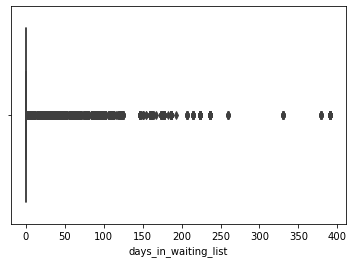

In [306]:
#Distribuição days_in_waiting_list
ax1 = fig.add_subplot()
sns.boxplot(x=df["days_in_waiting_list"])

In [307]:
#Distribuição adr
df.adr.value_counts()

62.00     3712
90.00     2230
75.00     2059
80.00     1534
65.00     1446
          ... 
97.36        1
101.21       1
79.83        1
71.93        1
209.25       1
Name: adr, Length: 8562, dtype: int64

<AxesSubplot:xlabel='adr'>

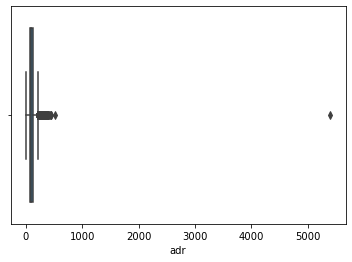

In [308]:
#Distribuição adr
ax1 = fig.add_subplot()
sns.boxplot(x=df["adr"])

In [309]:
#eliminar outliers em adr
df = df[df.adr <400]

C:\Users\Quims\AppData\Local\Temp\ipykernel_15276\4044805066.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>],
       [<AxesSubplot:title={'center':'adr'}>,
    

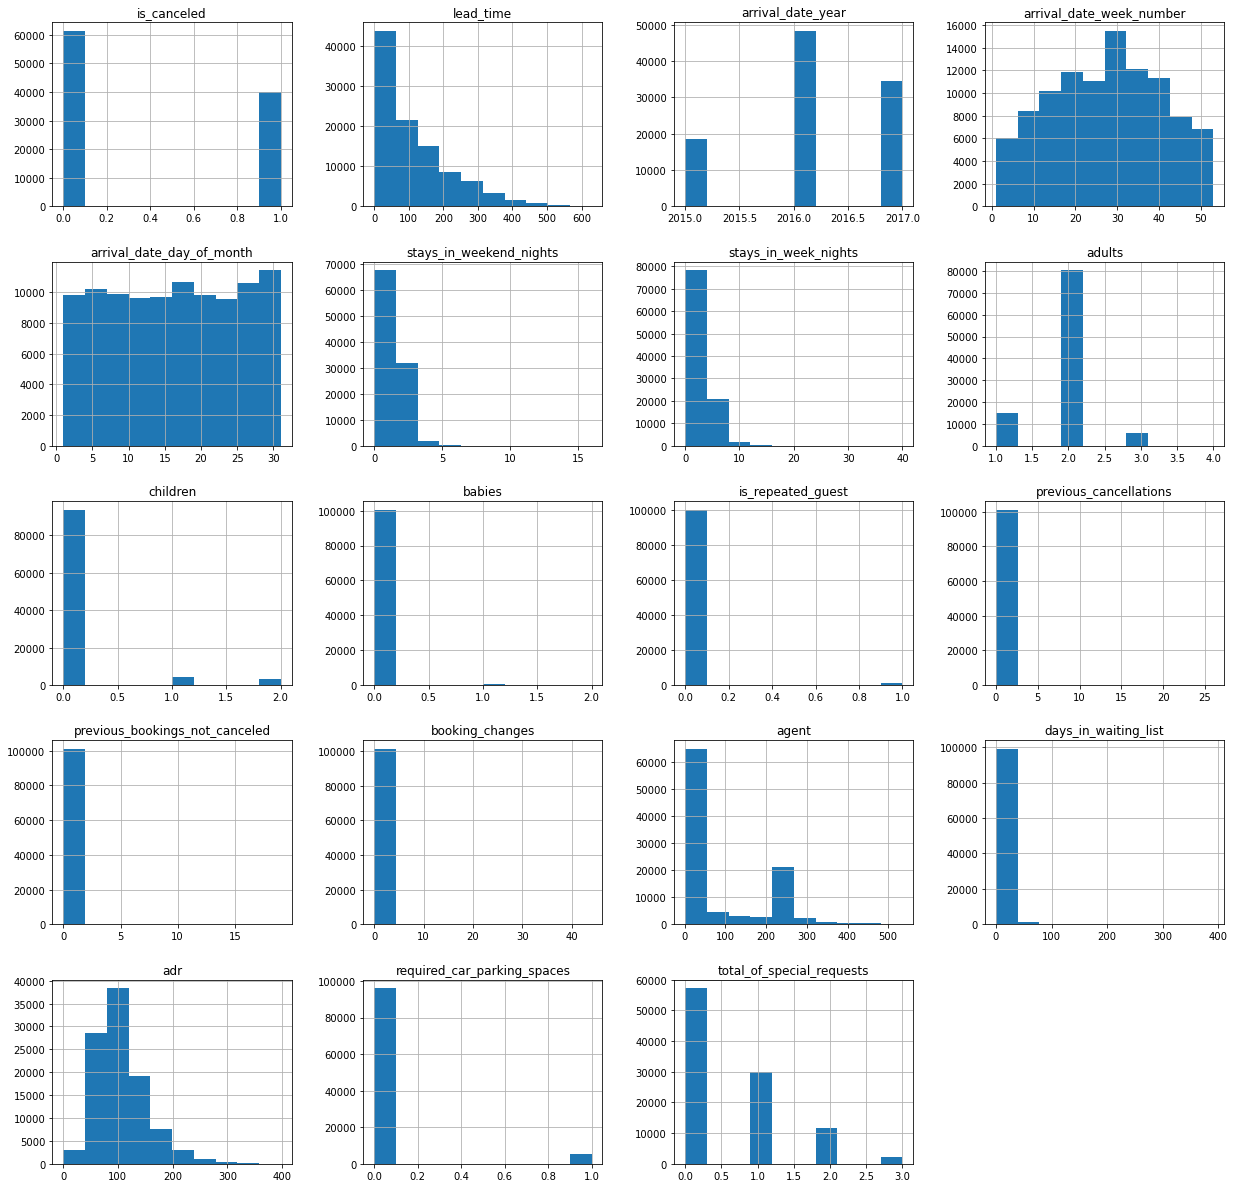

In [310]:
#Visualizar denovo e a distribuição

fig = plt.figure(figsize = (21,21))
ax = fig.gca()
df.hist(ax = ax)

In [311]:
df.lead_time.value_counts()

0      2592
1      2247
2      1388
3      1249
4      1197
       ... 
370       1
435       1
371       1
532       1
463       1
Name: lead_time, Length: 475, dtype: int64

 # Visualizar tendências e correlações
 
 -Tempo médio de estadia
 
 -Origem dos Hospedes
 
 -Preço ao longo do ano
 
 -Quartos
 
 -Número de hospedes ao longo do ano
 
 -Variaveis relacionados com Is_canceled
 

In [312]:
# Tempo médio de estadia dos Hospedes

In [313]:
df['days_stayed'] = df.stays_in_weekend_nights+df.stays_in_week_nights

In [314]:
#Media estadia ao longo dos anos
df2015E = df[df.arrival_date_year == 2015]

January = round(df2015E[df2015E.arrival_date_month == 'January'].days_stayed.mean(),2)
February = round(df2015E[df2015E.arrival_date_month == 'February'].days_stayed.mean(),2)
March = round(df2015E[df2015E.arrival_date_month == 'March'].days_stayed.mean(),2)
April = round(df2015E[df2015E.arrival_date_month == 'April'].days_stayed.mean(),2)
May = round(df2015E[df2015E.arrival_date_month == 'May'].days_stayed.mean(),2)
June = round(df2015E[df2015E.arrival_date_month == 'June'].days_stayed.mean(),2)
July = round(df2015E[df2015E.arrival_date_month == 'July'].days_stayed.mean(),2)
August = round(df2015E[df2015E.arrival_date_month == 'August'].days_stayed.mean(),2)
September = round(df2015E[df2015E.arrival_date_month == 'September'].days_stayed.mean(),2)
October = round(df2015E[df2015E.arrival_date_month == 'October'].days_stayed.mean(),2)
November = round(df2015E[df2015E.arrival_date_month == 'November'].days_stayed.mean(),2)
December = round(df2015E[df2015E.arrival_date_month == 'December'].days_stayed.mean(),2)




Meses2015 = [January, February, March, April, May, June,
              July, August, September,October,November,December]

indexMeses = ['January', 'February', 'March','April' , 'May' ,'June', 'July',
              'August', 'September', 'October',  'November', 'December']

Mesesestadia2015 = pd.DataFrame({'Média estadia por mês': Meses2015 },
             index= indexMeses)


Mesesestadia2015

,Média estadia por mês
January,NaN
February,NaN
March,NaN
April,NaN
May,NaN
June,NaN
July,3.93
August,3.75
September,3.57
October,3.21


In [315]:
#Media estadia ao longo dos anos
df2016E = df[df.arrival_date_year == 2016]

January = round(df2016E[df2016E.arrival_date_month == 'January'].days_stayed.mean(),2)
February = round(df2016E[df2016E.arrival_date_month == 'February'].days_stayed.mean(),2)
March = round(df2016E[df2016E.arrival_date_month == 'March'].days_stayed.mean(),2)
April = round(df2016E[df2016E.arrival_date_month == 'April'].days_stayed.mean(),2)
May = round(df2016E[df2016E.arrival_date_month == 'May'].days_stayed.mean(),2)
June = round(df2016E[df2016E.arrival_date_month == 'June'].days_stayed.mean(),2)
July = round(df2016E[df2016E.arrival_date_month == 'July'].days_stayed.mean(),2)
August = round(df2016E[df2016E.arrival_date_month == 'August'].days_stayed.mean(),2)
September = round(df2016E[df2016E.arrival_date_month == 'September'].days_stayed.mean(),2)
October = round(df2016E[df2016E.arrival_date_month == 'October'].days_stayed.mean(),2)
November = round(df2016E[df2016E.arrival_date_month == 'November'].days_stayed.mean(),2)
December = round(df2016E[df2016E.arrival_date_month == 'December'].days_stayed.mean(),2)

Meses2016 = [January, February, March, April, May, June,
              July, August, September,October,November,December]


Mesesestadia2016 = pd.DataFrame({'Média estadia por mês': Meses2016 },
             index= indexMeses)


Mesesestadia2016

,Média estadia por mês
January,2.99
February,3.18
March,3.38
April,3.34
May,3.37
June,3.51
July,4.06
August,3.99
September,3.53
October,3.27


In [316]:
#Media estadia ao longo dos anos
df2017E = df[df.arrival_date_year == 2017]

January = round(df2017E[df2017E.arrival_date_month == 'January'].days_stayed.mean(),2)
February = round(df2017E[df2017E.arrival_date_month == 'February'].days_stayed.mean(),2)
March = round(df2017E[df2017E.arrival_date_month == 'March'].days_stayed.mean(),2)
April = round(df2017E[df2017E.arrival_date_month == 'April'].days_stayed.mean(),2)
May = round(df2017E[df2017E.arrival_date_month == 'May'].days_stayed.mean(),2)
June = round(df2017E[df2017E.arrival_date_month == 'June'].days_stayed.mean(),2)
July = round(df2017E[df2017E.arrival_date_month == 'July'].days_stayed.mean(),2)
August = round(df2017E[df2017E.arrival_date_month == 'August'].days_stayed.mean(),2)
September = round(df2017E[df2017E.arrival_date_month == 'September'].days_stayed.mean(),2)
October = round(df2017E[df2017E.arrival_date_month == 'October'].days_stayed.mean(),2)
November = round(df2017E[df2017E.arrival_date_month == 'November'].days_stayed.mean(),2)
December = round(df2017E[df2017E.arrival_date_month == 'December'].days_stayed.mean(),2)

Meses2017 = [January, February, March, April, May, June,
              July, August, September,October,November,December]


Mesesestadia2017 = pd.DataFrame({'Média estadia por mês': Meses2017 },
             index= indexMeses)


Mesesestadia2017

,Média estadia por mês
January,3.48
February,3.36
March,3.77
April,3.60
May,3.44
June,3.80
July,4.01
August,4.13
September,NaN
October,NaN


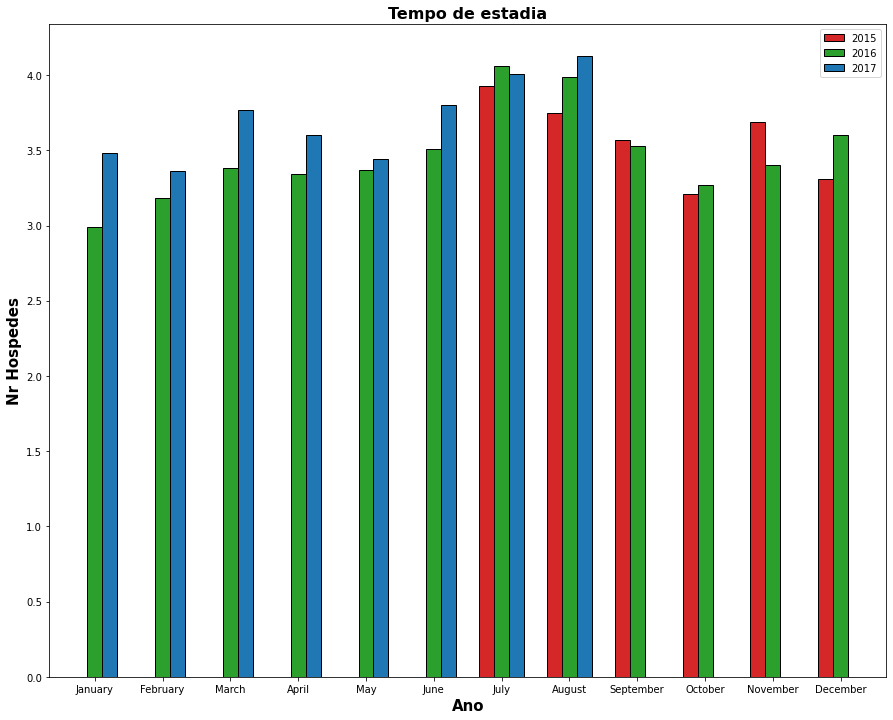

In [317]:
# set width of bar
barWidth = 0.22
fig = plt.subplots(figsize =(15, 12))
 
# set height of bar
Mesesestadia2015['Média estadia por mês']
Mesesestadia2016['Média estadia por mês']
Mesesestadia2017['Média estadia por mês']

 
# Set position of bar on X axis
br1 = np.arange(len(Mesesestadia2016['Média estadia por mês']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

 
# Make the plot
plt.bar(br1, Mesesestadia2015['Média estadia por mês'], color ='tab:red' , width = barWidth,
        edgecolor ='black', label ='2015')
plt.bar(br2, Mesesestadia2016['Média estadia por mês'], color ='tab:green' , width = barWidth,
        edgecolor ='black', label ='2016')
plt.bar(br3, Mesesestadia2017['Média estadia por mês'], color ='tab:blue', width = barWidth,
        edgecolor ='black', label ='2017')

# Adding Xticks
plt.xlabel('Ano', fontweight ='bold', fontsize = 15)
plt.ylabel('Nr Hospedes', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Mesesestadia2016['Média estadia por mês']))],
        indexMeses)

plt.title('Tempo de estadia',fontweight ='bold', fontsize=16, loc='center', pad=None)
 
plt.legend()
plt.show()


ORIGEM DOS HOSPEDES

In [318]:
#Origem dos hospedes por country
countrysvaleus = df.country.value_counts().head(20)[:]
#top 10 countrys
countrys = df.country.value_counts().head(20).keys()

# TOP 10 - Origem de hospedes
countrysDF = pd.DataFrame({'Country': countrysvaleus,
              'Country%': round((countrysvaleus / len(df.index) * 100), 2)}, index=countrys)

countrysDF

,Country,Country%
PRT,36723,36.27
GBR,10766,10.63
FRA,9710,9.59
ESP,7737,7.64
DEU,6914,6.83
ITA,3526,3.48
IRL,3178,3.14
BEL,2113,2.09
BRA,2054,2.03
USA,1940,1.92


<BarContainer object of 10 artists>

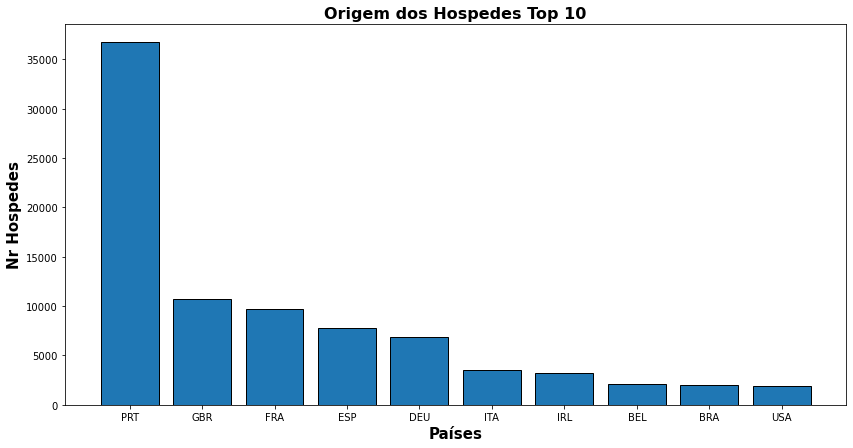

In [319]:
#ORIGEM de hospedes top 10

fig, ax = plt.subplots(figsize =(14, 7))

plt.xlabel('Países', fontweight ='bold', fontsize = 15)
plt.ylabel('Nr Hospedes', fontweight ='bold', fontsize = 15)
plt.title('Origem dos Hospedes Top 10',fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(countrysDF[:10].index, countrysDF['Country'][:10], width=0.8, bottom=None, edgecolor= 'black' ,align='center', data=None)



#Origem dos Hospedes - Reservas Cumpridas

In [320]:
#origem de hospedes Reservas Cumpridas


#valores dos top 20 countrys
countrysvaleusA = df[df.is_canceled == 0].country.value_counts().head(20)[:]
#nomes dos top 20 countrys
countrysA = df[df.is_canceled == 0].country.value_counts().head(20).keys()

# TOP 20 - Origem de hospedes
countrysDFA = pd.DataFrame({'Country': countrysvaleusA,
              'Country%': round((countrysvaleusA / len(df[df.is_canceled == 0].index) * 100), 2)}, index=countrysA)
#df
countrysDFA

,Country,Country%
PRT,13106,21.38
GBR,8421,13.74
FRA,7822,12.76
DEU,5708,9.31
ESP,5577,9.10
IRL,2350,3.83
ITA,2203,3.59
BEL,1648,2.69
NLD,1558,2.54
USA,1446,2.36


QUARTOS

-Tipos de quarto

-preço ao longo do ano

In [321]:
#Tipo de quartos reserved
reserved_room_typeDF = pd.DataFrame({'room_type': df.reserved_room_type.value_counts(),
                                    'room_type%': round((df.reserved_room_type.value_counts() / len(df.index) * 100), 2)},
             index=df.reserved_room_type.value_counts().keys())

reserved_room_typeDF

,room_type,room_type%
A,72300,71.40
D,17326,17.11
E,5356,5.29
F,2485,2.45
G,1739,1.72
B,777,0.77
C,754,0.74
H,518,0.51


<BarContainer object of 8 artists>

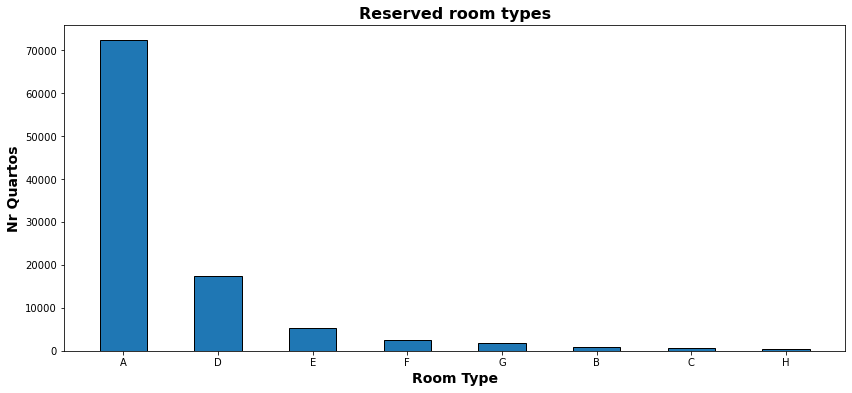

In [322]:
#Tipo de quartos reserved
fig, ax = plt.subplots(figsize =(14, 6))

plt.xlabel('Room Type', fontweight ='bold', fontsize = 14)
plt.ylabel('Nr Quartos', fontweight='bold', fontsize = 14)
plt.title('Reserved room types' ,fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(reserved_room_typeDF.index, reserved_room_typeDF['room_type'], width=0.5, bottom=None, edgecolor= 'black' ,align='center', data=None)


In [323]:
reserved_room_typeDF.index

Index(['A', 'D', 'E', 'F', 'G', 'B', 'C', 'H'], dtype='object')

In [324]:
#Tipo de quartos reserved
fig1 = px.pie(reserved_room_typeDF, values='room_type', names = reserved_room_typeDF.index,
              title='reserved_room_type')


fig1.show()

Tipos de quartos por hotel

In [325]:
#Distribuição do tipo de hoteis
df.hotel.value_counts()

City Hotel      70108
Resort Hotel    31147
Name: hotel, dtype: int64

In [326]:
#Média de preço pago por hotel por noite
CityHotel = df[df.hotel == 'City Hotel'].adr.mean()
ResortHotel = df[df.hotel == 'Resort Hotel'].adr.mean()

print(f'Preço por noite \nCity Hotel: {round(CityHotel,2)}\nResort Hotel: {round(ResortHotel,2)}')

Preço por noite 
City Hotel: 107.48
Resort Hotel: 101.14


In [327]:
#City Hotel - tipos de quartos 
df[df.hotel == 'City Hotel'].assigned_room_type.value_counts()

A    50704
D    13580
F     1802
E     1746
B     1551
G      515
C      115
K       95
Name: assigned_room_type, dtype: int64

PREÇOS QUARTOS por Hotel

In [328]:
CityHotelRoom = df[df.hotel == 'City Hotel'] 

CityHotelRoom.assigned_room_type.unique()

array(['A', 'D', 'B', 'G', 'F', 'E', 'K', 'C'], dtype=object)

In [329]:
#City Hotel - preços por quartos

CityHotelRoom = df[df.hotel == 'City Hotel'] 


precoCityA = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'A'].adr.mean(),2)
precoCityB = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'B'].adr.mean(),2)
precoCityC = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'C'].adr.mean(),2)
precoCityD = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'D'].adr.mean(),2)
precoCityE = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'E'].adr.mean(),2)
precoCityF = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'F'].adr.mean(),2)
precoCityG = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'G'].adr.mean(),2)
#QUarto H I J não existe no City Hotel
precoCityH = np.nan
precoCityI =np.nan
precoCityK = round(CityHotelRoom[CityHotelRoom.assigned_room_type == 'K'].adr.mean(),2)




PrecoCityRoomsMedia = [precoCityA, precoCityB, precoCityC, precoCityD, precoCityE,
                                    precoCityF, precoCityG,precoCityH,precoCityI, precoCityK]

NomeQuartoCity = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H','I', 'k']

PrecoCityRooms = pd.DataFrame({'City Hotel - Preço_Quarto': PrecoCityRoomsMedia},
             index=NomeQuartoCity)

#Sorted por preço
PrecoCityRooms

,City Hotel - Preço_Quarto
A,97.81
B,98.27
C,106.08
D,124.81
E,151.96
F,187.08
G,201.17
H,NaN
I,NaN
k,111.39


In [330]:
#Resort Hotel - tipos de quartos 
df[df.hotel == 'Resort Hotel'].assigned_room_type.value_counts()

A    13184
D     8097
E     4480
C     1728
G     1574
F     1269
H      581
I      121
B      113
Name: assigned_room_type, dtype: int64

In [331]:
#Observar os quartos do hotel Resort
ResortHotelRoom = df[df.hotel == 'Resort Hotel'] 

ResortHotelRoom.assigned_room_type.value_counts().keys()

Index(['A', 'D', 'E', 'C', 'G', 'F', 'H', 'I', 'B'], dtype='object')

In [332]:
#City Hotel - preços por quartos

ResortHotelRoom = df[df.hotel == 'Resort Hotel'] 

precoResortA = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'A'].adr.mean(),2)
precoResortB = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'B'].adr.mean(),2)
precoResortC = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'C'].adr.mean(),2)
precoResortD = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'D'].adr.mean(),2)
precoResortE = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'E'].adr.mean(),2)
precoResortF = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'F'].adr.mean(),2)
precoResortG = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'G'].adr.mean(),2)
precoResortH = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'H'].adr.mean(),2)
precoResortI = round(ResortHotelRoom[ResortHotelRoom.assigned_room_type == 'I'].adr.mean(),2)
#QUarto K não existe no Resort Hotel
precoResortK = np.nan




PrecoResortRoomsMedia = [precoResortA, precoResortB, precoResortC, precoResortD, precoResortE,
                                    precoResortF, precoResortG, precoResortH, precoResortI,precoResortK]

NomeQuartoResort = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K']

PrecoResortRooms = pd.DataFrame({'Resort Hotel - Preço_Quarto': PrecoResortRoomsMedia,
                                 'City Hotel - Preço_Quarto': PrecoCityRoomsMedia},
             index=NomeQuartoResort)

#Sorted por preço
PrecoResortRooms

,Resort Hotel - Preço_Quarto,City Hotel - Preço_Quarto
A,85.98,97.81
B,114.04,98.27
C,119.23,106.08
D,92.82,124.81
E,112.39,151.96
F,127.20,187.08
G,167.25,201.17
H,182.54,NaN
I,99.56,NaN
K,NaN,111.39


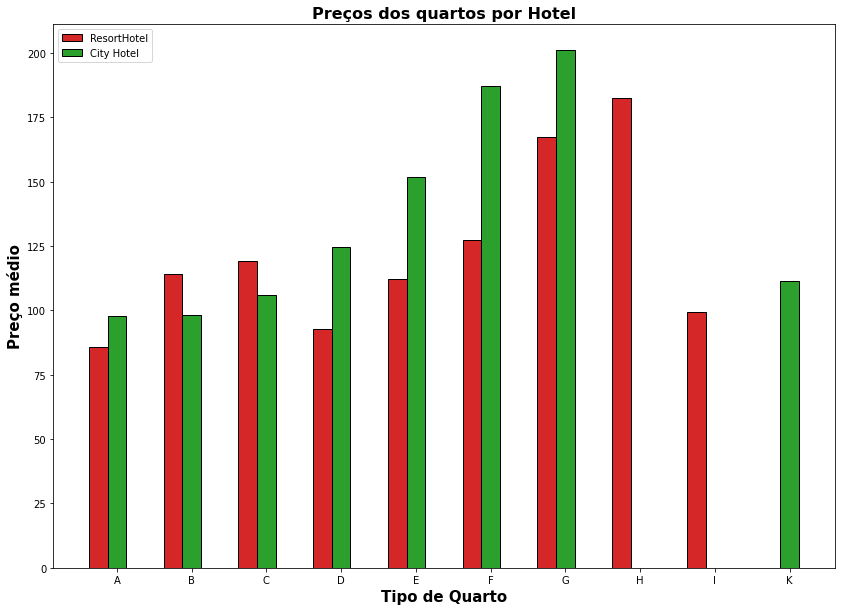

In [333]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(14, 10))
 
# set height of bar
PrecoResortRoomsMedia
PrecoCityRoomsMedia
 
# Set position of bar on X axis
br1 = np.arange(len(PrecoResortRoomsMedia))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, PrecoResortRoomsMedia, color ='tab:red' , width = barWidth,
        edgecolor ='black', label ='ResortHotel')
plt.bar(br2, PrecoCityRoomsMedia, color ='tab:green', width = barWidth,
        edgecolor ='black', label ='City Hotel')

# Adding Xticks
plt.xlabel('Tipo de Quarto', fontweight ='bold', fontsize = 15)
plt.ylabel('Preço médio', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(PrecoResortRoomsMedia))],
        NomeQuartoResort)

plt.title('Preços dos quartos por Hotel',fontweight ='bold', fontsize=16, loc='center', pad=None)
 
plt.legend()
plt.show()

Variação do preço ao longo do ano

In [334]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [335]:
#Preços ao longo do ano 2015

df2015 = df[df.arrival_date_year == 2015]

precoJanuary = round(df2015[df2015.arrival_date_month == 'January'].adr.mean(),2)
precoFebruary = round(df2015[df2015.arrival_date_month == 'February'].adr.mean(),2)
precoMarch = round(df2015[df2015.arrival_date_month == 'March'].adr.mean(),2)
precoApril = round(df2015[df2015.arrival_date_month == 'April'].adr.mean(),2)
precoMay = round(df2015[df2015.arrival_date_month == 'May'].adr.mean(),2)
precoJune = round(df2015[df2015.arrival_date_month == 'June'].adr.mean(),2)
precoJuly = round(df2015[df2015.arrival_date_month == 'July'].adr.mean(),2)
precoAugust = round(df2015[df2015.arrival_date_month == 'August'].adr.mean(),2)
precoSeptember = round(df2015[df2015.arrival_date_month == 'September'].adr.mean(),2)
precoOctober = round(df2015[df2015.arrival_date_month == 'October'].adr.mean(),2)
precoNovember = round(df2015[df2015.arrival_date_month == 'November'].adr.mean(),2)
precoDecember = round(df2015[df2015.arrival_date_month == 'December'].adr.mean(),2)




PrecoMeses2015 = [precoJanuary, precoFebruary, precoMarch, precoApril, precoMay, precoJune,
              precoJuly, precoAugust, precoSeptember,precoOctober,precoNovember,precoDecember]

indexMeses = ['January', 'February', 'March','April' , 'May' ,'June', 'July',
              'August', 'September', 'October',  'November', 'December']

PrecosAno2015 = pd.DataFrame({'Média Preço por mês': PrecoMeses2015 },
             index= indexMeses)


PrecosAno2015

,Média Preço por mês
January,NaN
February,NaN
March,NaN
April,NaN
May,NaN
June,NaN
July,97.52
August,105.55
September,97.27
October,82.93


In [336]:
#Preços ao longo do ano 2016

df2016 = df[df.arrival_date_year == 2016]

precoJanuary = round(df2016[df2016.arrival_date_month == 'January'].adr.mean(),2)
precoFebruary = round(df2016[df2016.arrival_date_month == 'February'].adr.mean(),2)
precoMarch = round(df2016[df2016.arrival_date_month == 'March'].adr.mean(),2)
precoApril = round(df2016[df2016.arrival_date_month == 'April'].adr.mean(),2)
precoMay = round(df2016[df2016.arrival_date_month == 'May'].adr.mean(),2)
precoJune = round(df2016[df2016.arrival_date_month == 'June'].adr.mean(),2)
precoJuly = round(df2016[df2016.arrival_date_month == 'July'].adr.mean(),2)
precoAugust = round(df2016[df2016.arrival_date_month == 'August'].adr.mean(),2)
precoSeptember = round(df2016[df2016.arrival_date_month == 'September'].adr.mean(),2)
precoOctober = round(df2016[df2016.arrival_date_month == 'October'].adr.mean(),2)
precoNovember = round(df2016[df2016.arrival_date_month == 'November'].adr.mean(),2)
precoDecember = round(df2016[df2016.arrival_date_month == 'December'].adr.mean(),2)




PrecoMeses2016 = [precoJanuary, precoFebruary, precoMarch, precoApril, precoMay, precoJune,
              precoJuly, precoAugust, precoSeptember,precoOctober,precoNovember,precoDecember]

indexMeses = ['January', 'February', 'March','April' , 'May' ,'June', 'July',
              'August', 'September', 'October',  'November', 'December']

PrecosAno2016 = pd.DataFrame({'Média Preço por mês': PrecoMeses2016 },
             index= indexMeses)


PrecosAno2016

,Média Preço por mês
January,69.39
February,73.03
March,81.52
April,91.72
May,99.52
June,108.88
July,127.05
August,143.37
September,116.46
October,100.36


In [337]:


#Preços ao longo do ano 2017

df2017 = df[df.arrival_date_year == 2017]

precoJanuary2017 = round(df2017[df2017.arrival_date_month == 'January'].adr.mean(),2)
precoFebruary2017 = round(df2017[df2017.arrival_date_month == 'February'].adr.mean(),2)
precoMarch2017 = round(df2017[df2017.arrival_date_month == 'March'].adr.mean(),2)
precoApril2017 = round(df2017[df2017.arrival_date_month == 'April'].adr.mean(),2)
precoMay2017 = round(df2017[df2017.arrival_date_month == 'May'].adr.mean(),2)
precoJune2017 = round(df2017[df2017.arrival_date_month == 'June'].adr.mean(),2)
precoJuly2017 = round(df2017[df2017.arrival_date_month == 'July'].adr.mean(),2)
precoAugust2017 = round(df2017[df2017.arrival_date_month == 'August'].adr.mean(),2)
precoSeptember2017 = round(df2017[df2017.arrival_date_month == 'September'].adr.mean(),2)
precoOctober2017 = round(df2017[df2017.arrival_date_month == 'October'].adr.mean(),2)
precoNovember2017 = round(df2017[df2017.arrival_date_month == 'November'].adr.mean(),2)
precoDecember2017 = round(df2017[df2017.arrival_date_month == 'December'].adr.mean(),2)



precoJanuaryGeral = round(df[df.arrival_date_month == 'January'].adr.mean(),2)
precoFebruaryGeral = round(df[df.arrival_date_month == 'February'].adr.mean(),2)
precoMarchGeral = round(df[df.arrival_date_month == 'March'].adr.mean(),2)
precoAprilGeral = round(df[df.arrival_date_month == 'April'].adr.mean(),2)
precoMayGeral = round(df[df.arrival_date_month == 'May'].adr.mean(),2)
precoJuneGeral = round(df[df.arrival_date_month == 'June'].adr.mean(),2)
precoJulyGeral = round(df[df.arrival_date_month == 'July'].adr.mean(),2)
precoAugustGeral = round(df[df.arrival_date_month == 'August'].adr.mean(),2)
precoSeptemberGeral = round(df[df.arrival_date_month == 'September'].adr.mean(),2)
precoOctoberGeral = round(df[df.arrival_date_month == 'October'].adr.mean(),2)
precoNovemberGeral = round(df[df.arrival_date_month == 'November'].adr.mean(),2)
precoDecemberGeral = round(df[df.arrival_date_month == 'December'].adr.mean(),2)

#2017
PrecoMeses2017 = [precoJanuary2017, precoFebruary2017, precoMarch2017, precoApril2017, precoMay2017, precoJune2017,
              precoJuly2017, precoAugust2017, precoSeptember2017,precoOctober2017,precoNovember2017,precoDecember2017]
#Geral
PrecoMesesGeral = [precoJanuaryGeral, precoFebruaryGeral, precoMarchGeral, precoAprilGeral, precoMayGeral, precoJuneGeral,
              precoJulyGeral, precoAugustGeral, precoSeptemberGeral,precoOctoberGeral,precoNovemberGeral,precoDecemberGeral]

VariacaoGeral = [precoJanuaryGeral-precoDecemberGeral, precoFebruaryGeral-precoJanuaryGeral, precoMarchGeral-precoFebruaryGeral,
                 precoAprilGeral-precoMarchGeral, precoMayGeral-precoAprilGeral, precoJuneGeral-precoMayGeral,
              precoJulyGeral-precoJuneGeral, precoAugustGeral-precoJulyGeral, precoSeptemberGeral-precoAugustGeral,
                 precoOctoberGeral-precoSeptemberGeral,precoNovemberGeral-precoOctoberGeral,
                 precoDecemberGeral-precoNovemberGeral]

indexMeses = ['January', 'February', 'March','April' , 'May' ,'June', 'July',
              'August', 'September', 'October',  'November', 'December']

PrecosAnos = pd.DataFrame({'Média Preço por mês 2015': PrecoMeses2015,'Média Preço por mês 2016': PrecoMeses2016,
                           'Média Preço por mês 2017': PrecoMeses2017, 'Média Preço por mês Geral': PrecoMesesGeral, 
                          'Variação Relt. mês anterior': VariacaoGeral},
             index= indexMeses)


PrecosAnos

,Média Preço por mês 2015,Média Preço por mês 2016,Média Preço por mês 2017,Média Preço por mês Geral,Variação Relt. mês anterior
January,NaN,69.39,79.26,75.41,-7.23
February,NaN,73.03,81.10,77.29,1.88
March,NaN,81.52,85.87,83.71,6.42
April,NaN,91.72,115.41,103.61,19.90
May,NaN,99.52,121.16,111.13,7.52
June,NaN,108.88,128.58,118.82,7.69
July,97.52,127.05,145.51,128.29,9.47
August,105.55,143.37,164.35,141.04,12.75
September,97.27,116.46,NaN,107.21,-33.83
October,82.93,100.36,NaN,92.68,-14.53


In [338]:
df[df.arrival_date_year == 2017].arrival_date_month.value_counts()

May         5337
June        4897
April       4824
July        4796
August      4548
March       4051
February    3342
January     2718
Name: arrival_date_month, dtype: int64

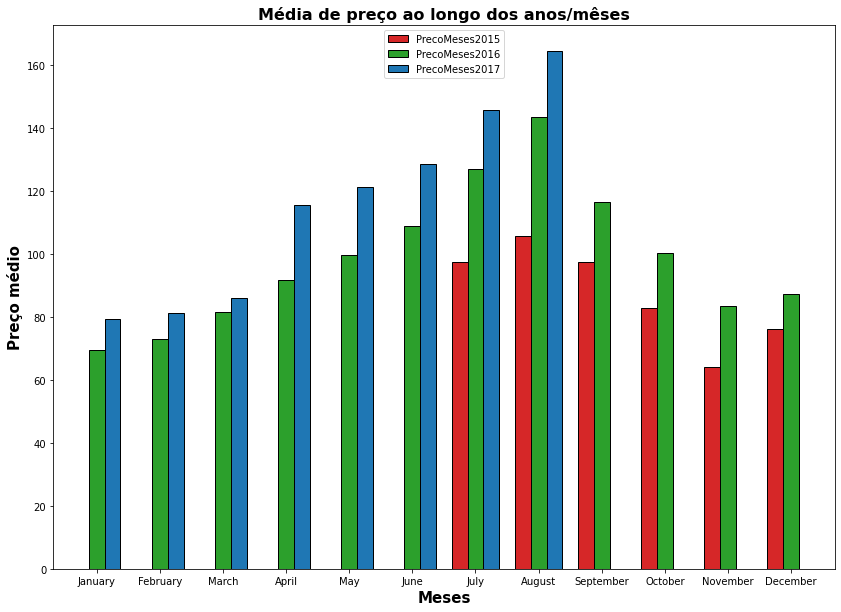

In [339]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(14, 10))
 
# set height of bar
PrecoMeses2015
PrecoMeses2016
PrecoMeses2017
 
# Set position of bar on X axis
br1 = np.arange(len(PrecoMeses2015))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, PrecoMeses2015, color ='tab:red' , width = barWidth,
        edgecolor ='black', label ='PrecoMeses2015')
plt.bar(br2, PrecoMeses2016, color ='tab:green', width = barWidth,
        edgecolor ='black', label ='PrecoMeses2016')
plt.bar(br3, PrecoMeses2017, color ='tab:blue', width = barWidth,
        edgecolor ='black', label ='PrecoMeses2017')
 
# Adding Xticks
plt.xlabel('Meses', fontweight ='bold', fontsize = 15)
plt.ylabel('Preço médio', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(PrecoMeses2015))],
        indexMeses)

plt.title('Média de preço ao longo dos anos/mêses',fontweight ='bold', fontsize=16, loc='center', pad=None)
 
plt.legend()
plt.show()

<BarContainer object of 12 artists>

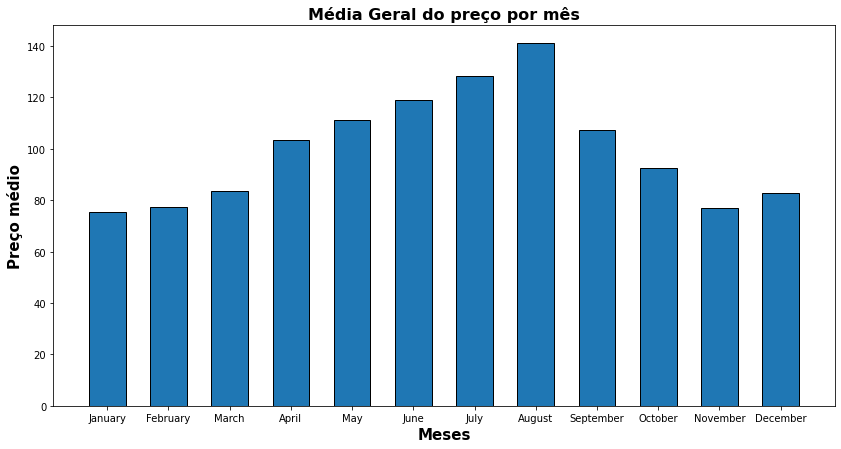

In [340]:
#Média de preços Geral ao longo do ano
# Figure Size
fig, ax = plt.subplots(figsize =(14, 7))


plt.xlabel('Meses', fontweight ='bold', fontsize = 15)
plt.ylabel('Preço médio', fontweight ='bold', fontsize = 15)
plt.title('Média Geral do preço por mês',fontweight ='bold', fontsize=16, loc='center', pad=None)


plt.bar(x = indexMeses ,height=PrecosAnos['Média Preço por mês Geral'],edgecolor= 'black',width = 0.6)

In [341]:
#Preços ao longo do ano CITY HOTEL


CityHotelRoom = df[df.hotel == 'City Hotel'] 

precoJanuaryCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'January'].adr.mean(),2)
precoFebruaryCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'February'].adr.mean(),2)
precoMarchCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'March'].adr.mean(),2)
precoAprilCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'April'].adr.mean(),2)
precoMayCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'May'].adr.mean(),2)
precoJuneCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'June'].adr.mean(),2)
precoJulyCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'July'].adr.mean(),2)
precoAugustCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'August'].adr.mean(),2)
precoSeptemberCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'September'].adr.mean(),2)
precoOctoberCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'October'].adr.mean(),2)
precoNovemberCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'November'].adr.mean(),2)
precoDecemberCity = round(CityHotelRoom[CityHotelRoom.arrival_date_month == 'December'].adr.mean(),2)




PrecoMesesCity = [precoJanuaryCity, precoFebruaryCity, precoMarchCity, precoAprilCity, precoMayCity, precoJuneCity,
              precoJulyCity, precoAugustCity, precoSeptemberCity,precoOctoberCity,precoNovemberCity,precoDecemberCity]

VariacaoCity = [precoJanuaryCity-precoDecemberCity, precoFebruaryCity-precoJanuaryCity,
                  precoMarchCity-precoFebruaryCity, precoAprilCity-precoMarchCity, precoMayCity-precoAprilCity,
                  precoJuneCity- precoMayCity, precoJulyCity-precoJuneCity,precoAugustCity-precoJulyCity,
                  precoSeptemberCity-precoAugustCity, precoOctoberCity-precoNovemberCity,
                  precoNovemberCity-precoOctoberCity, precoDecemberCity-precoNovemberCity]

indexMesesCity = ['January', 'February', 'March','April' , 'May' ,'June', 'July',
              'August', 'September', 'October',  'November', 'December']

PrecosAnoCity = pd.DataFrame({'H City - Média Preço por mês': PrecoMesesCity, 'Variação Relt. mês anterior' :VariacaoCity },
             index= indexMesesCity)


PrecosAnoCity

,H City - Média Preço por mês,Variação Relt. mês anterior
January,85.91,-5.92
February,87.71,1.80
March,93.71,6.00
April,112.82,19.11
May,122.62,9.80
June,120.99,-1.63
July,112.44,-8.55
August,116.60,4.16
September,111.47,-5.13
October,101.63,10.73


<BarContainer object of 12 artists>

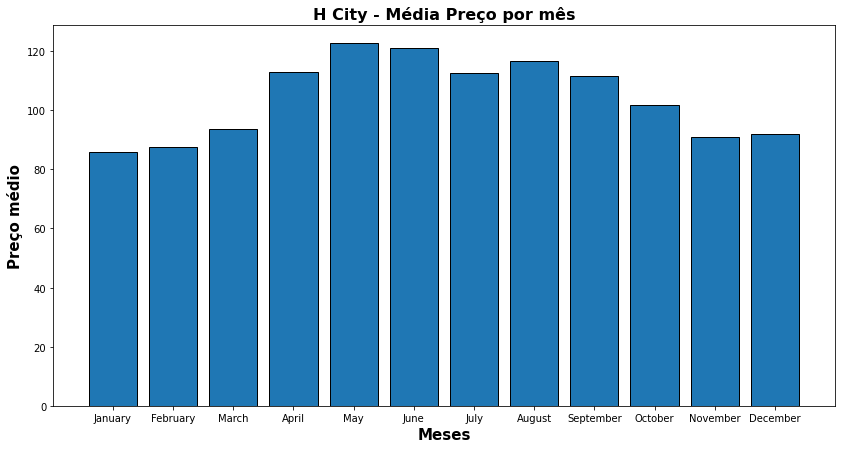

In [342]:
#Média de preços por mes city hotel
fig, ax = plt.subplots(figsize =(14, 7))

plt.xlabel('Meses', fontweight ='bold', fontsize = 15)
plt.ylabel('Preço médio', fontweight ='bold', fontsize = 15)
plt.title('H City - Média Preço por mês',fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(indexMesesCity, PrecosAnoCity['H City - Média Preço por mês'], width=0.8, bottom=None, edgecolor= 'black' ,align='center', data=None)



In [343]:
#Preços ao longo do ano RESORT HOTEL

ResortHotelRoom = df[df.hotel == 'Resort Hotel']

precoJanuaryResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'January'].adr.mean(),2)
precoFebruaryResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'February'].adr.mean(),2)
precoMarchResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'March'].adr.mean(),2)
precoAprilResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'April'].adr.mean(),2)
precoMayResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'May'].adr.mean(),2)
precoJuneResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'June'].adr.mean(),2)
precoJulyResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'July'].adr.mean(),2)
precoAugustResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'August'].adr.mean(),2)
precoSeptemberResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'September'].adr.mean(),2)
precoOctoberResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'October'].adr.mean(),2)
precoNovemberResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'November'].adr.mean(),2)
precoDecemberResort = round(ResortHotelRoom[ResortHotelRoom.arrival_date_month == 'December'].adr.mean(),2)




PrecoMesesResort = [precoJanuaryResort, precoFebruaryResort, precoMarchResort, precoAprilResort, precoMayResort, precoJuneResort,
              precoJulyResort, precoAugustResort, precoSeptemberResort,precoOctoberResort,precoNovemberResort,
                    precoDecemberResort]

indexMesesResort = ['January', 'February', 'March','April' , 'May' ,'June', 'July',
              'August', 'September', 'October',  'November', 'December']

#subtrair o valor do mes anterior pelo actual
VariacaoResort = [precoJanuaryResort-precoDecemberResort, precoFebruaryResort-precoJanuaryResort,
                  precoMarchResort-precoFebruaryResort, precoAprilResort-precoMarchResort, precoMayResort-precoAprilResort,
                  precoJuneResort- precoMayResort, precoJulyResort-precoJuneResort,precoAugustResort-precoJulyResort,
                  precoSeptemberResort-precoAugustResort, precoOctoberResort-precoNovemberResort,
                  precoNovemberResort-precoOctoberResort, precoDecemberResort-precoNovemberResort]

PrecosAnoResort = pd.DataFrame({'H Resort - Média Preço por mês': PrecoMesesResort, 'Variação Relt. mês anterior': VariacaoResort},
             index= indexMesesResort)



PrecosAnoResort

,H Resort - Média Preço por mês,Variação Relt. mês anterior
January,52.57,-12.82
February,58.11,5.54
March,59.62,1.51
April,81.66,22.04
May,82.26,0.60
June,112.88,30.62
July,157.79,44.91
August,188.16,30.37
September,95.94,-92.22
October,66.39,15.82


<BarContainer object of 12 artists>

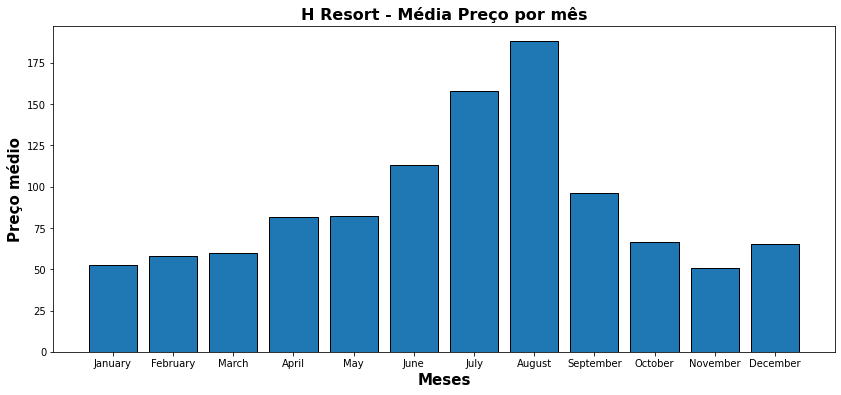

In [344]:
fig, ax = plt.subplots(figsize =(14, 6))

plt.xlabel('Meses', fontweight ='bold', fontsize = 15)
plt.ylabel('Preço médio', fontweight ='bold', fontsize = 15)
plt.title('H Resort - Média Preço por mês',fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(indexMesesResort, PrecosAnoResort['H Resort - Média Preço por mês'], width=0.8,
        bottom=None, edgecolor= 'black' ,align='center', data=None)

VARIAÇÃO DE NR DE HOSPEDES AO LONGO DO ANOS

In [348]:
#Numero de resort_guest hospedes por mês

resort_guests = df[(df['hotel'] == 'Resort Hotel')]
resort_guests = resort_guests['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,4255
1,July,3989
2,April,2843
3,May,2834
4,June,2603
5,September,2544
6,March,2356
7,October,2352
8,February,2230
9,December,1900


In [349]:
#Número de resort_guest hospedes em cada mês
#city_guests = df['arrival_date_month'].value_counts().reset_index()

city_guests = df[(df['hotel'] == 'City Hotel')]
city_guests = city_guests['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,8206
1,July,7425
2,May,7117
3,June,7104
4,October,6908
5,April,6774
6,September,6734
7,March,5680
8,February,4103
9,December,3566


In [350]:
#Número de resort_guest e city_guest hospedes em cada mês
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guests in city hotel']
final_guests

,month,no of guests in resort,no of guests in city hotel
0,August,4255,8206
1,July,3989,7425
2,April,2843,6774
3,May,2834,7117
4,June,2603,7104
5,September,2544,6734
6,March,2356,5680
7,October,2352,6908
8,February,2230,4103
9,December,1900,3566


In [355]:
#Número de resort_guest e city_guest hospedes em ordem mensal

import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final_guests = sort_month(final_guests,'month')
final_guests

ModuleNotFoundError: No module named 'sorted_months_weekdays'

CORRELAÇÃO COM CANCELED

-Detetar e selecionar as mehores variáveis com correlação ao Is_Canceled

Origem dos Hospedes - Reservas Canceladas

In [216]:
#TOP 10 - origem de hospedes Reservas Canceladas


#valores dos top 20 countrys
countrysvaleusB = df[df.is_canceled == 1].country.value_counts().head(10)[:]
#nomes dos top 10 countrys
countrysB = df[df.is_canceled == 1].country.value_counts().head(10).keys()

# TOP 20 - Origem de hospedes
countrysDFB = pd.DataFrame({'Country': countrysvaleusB,
              'Country%': round((countrysvaleusB / len(df[df.is_canceled == 1].index) * 100), 2)}, index=countrysB)

#df
countrysDFB


,Country,Country%
PRT,23620,59.13
GBR,2345,5.87
ESP,2160,5.41
FRA,1888,4.73
ITA,1323,3.31
DEU,1206,3.02
IRL,828,2.07
BRA,818,2.05
USA,494,1.24
BEL,465,1.16


<BarContainer object of 10 artists>

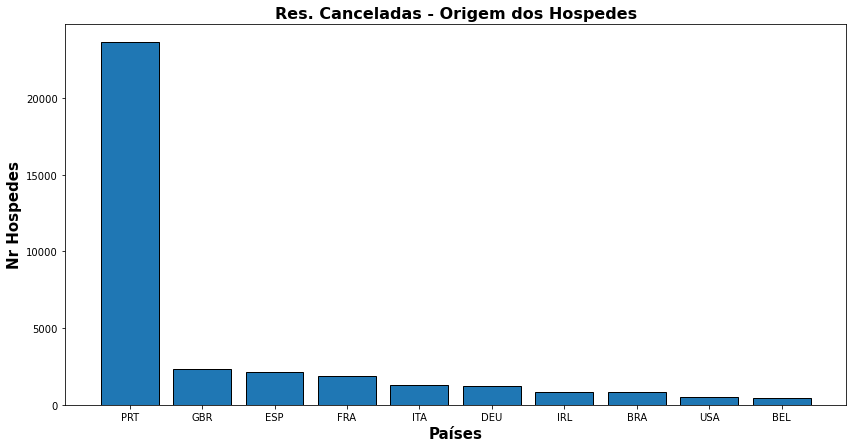

In [217]:
#ORIGEM de hospedes cancel

fig, ax = plt.subplots(figsize =(14, 7))

plt.xlabel('Países', fontweight ='bold', fontsize = 15)
plt.ylabel('Nr Hospedes', fontweight ='bold', fontsize = 15)
plt.title('Res. Canceladas - Origem dos Hospedes',fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(countrysDFB.index, countrysDFB['Country'], width=0.8, bottom=None, edgecolor= 'black' ,align='center', data=None)




In [ ]:
df.total_of_special_requests.value_counts()

In [218]:
#TOP 10 -total_of_special_requests Reservas Canceladas


#valores dos top 10 total_of_special_requests
total_of_special_requestsB = df[df.is_canceled == 1].total_of_special_requests.value_counts().head(10)[:]
#nomes dos top 10 total_of_special_requests
Indextotal_of_special_requestsB = df[df.is_canceled == 1].total_of_special_requests.value_counts().head(10).keys()

# TOP 10  total_of_special_requests
total_of_special_requestsDFB = pd.DataFrame({'total_of_special_requests': total_of_special_requestsB,
              'total_of_special_requests%': round((total_of_special_requestsB / len(df[df.is_canceled == 1].index) * 100), 2)}, index=Indextotal_of_special_requestsB)

#df
total_of_special_requestsDFB

,total_of_special_requests,total_of_special_requests%
0,29774,74.53
1,7020,17.57
2,2736,6.85
3,419,1.05


<BarContainer object of 4 artists>

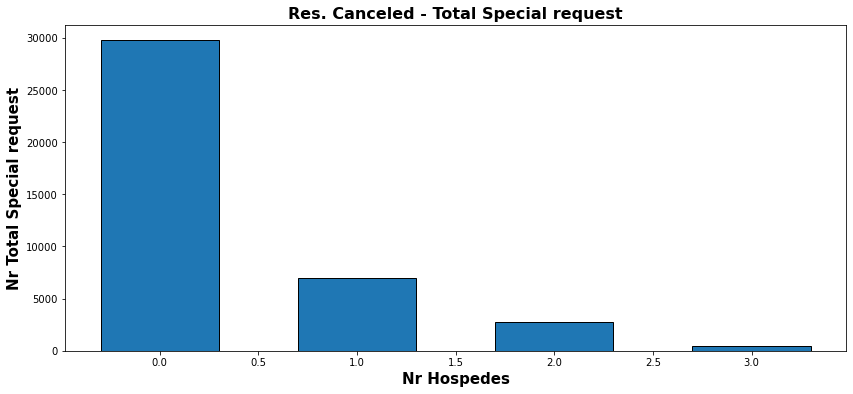

In [219]:
#NR total_of_special_requestsDFB


fig, ax = plt.subplots(figsize =(14, 6))

plt.xlabel('Nr Hospedes', fontweight ='bold', fontsize = 15)
plt.ylabel('Nr Total Special request', fontweight='bold', fontsize = 15)
plt.title('Res. Canceled - Total Special request',fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar([0,1,2,3], total_of_special_requestsDFB['total_of_special_requests'], width=0.6, bottom=None, edgecolor= 'black' ,align='center', data=None)


In [ ]:
df.info()

In [220]:
#TOP 10 - market_segment Reservas Canceladas


#valores dos top 10 market_segment
market_segment = df[df.is_canceled == 1].market_segment.value_counts().head(10)[:]
#nomes dos top 10 
market_segmentIndex = df[df.is_canceled == 1].market_segment.value_counts().head(10).keys()

# TOP 10 market_segment
market_segmentDFB = pd.DataFrame({'market_segment': market_segment,
              'market_segment%': round((market_segment / len(df[df.is_canceled == 1].index) * 100), 2)}, index=market_segmentIndex)

#df
market_segmentDFB


,market_segment,market_segment%
Online TA,20567,51.48
Groups,10040,25.13
Offline TA/TO,8002,20.03
Direct,1164,2.91
Corporate,170,0.43
Aviation,6,0.02


<BarContainer object of 6 artists>

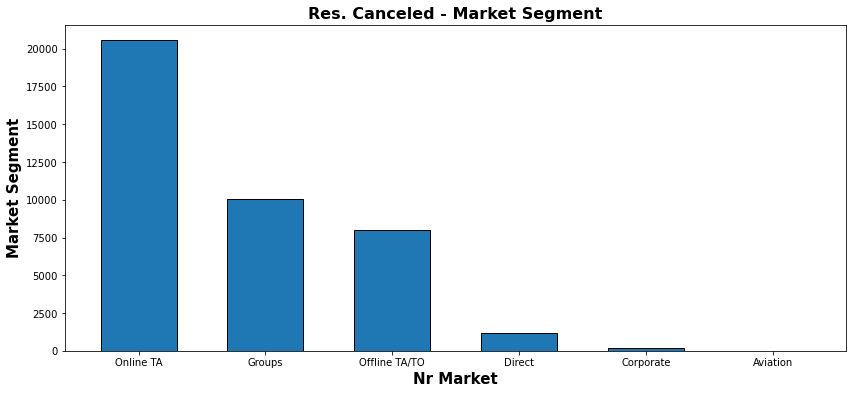

In [221]:
#mmarket_segmentDFB


fig, ax = plt.subplots(figsize =(14, 6))

plt.xlabel('Nr Market', fontweight ='bold', fontsize = 15)
plt.ylabel('Market Segment', fontweight='bold', fontsize = 15)
plt.title('Res. Canceled - Market Segment',fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(market_segmentDFB.index, market_segmentDFB['market_segment'], width=0.6, bottom=None, edgecolor= 'black' ,align='center', data=None)


In [222]:
#TOP 10 - deposit_type Reservas Canceladas


#valores dos top 10 deposit_type
deposit_type = df[df.is_canceled == 1].deposit_type.value_counts().head(10)[:]
#nomes dos top 10 
deposit_typeIndex = df[df.is_canceled == 1].deposit_type.value_counts().head(10).keys()

# TOP 10 deposit_type
deposit_typeDFB = pd.DataFrame({'deposit_type': deposit_type,
              'deposit_type%': round((deposit_type / len(df[df.is_canceled == 1].index) * 100), 2)}, index=deposit_typeIndex)

#df
deposit_typeDFB


,deposit_type,deposit_type%
No Deposit,27457,68.73
Non Refund,12468,31.21
Refundable,24,0.06


<BarContainer object of 3 artists>

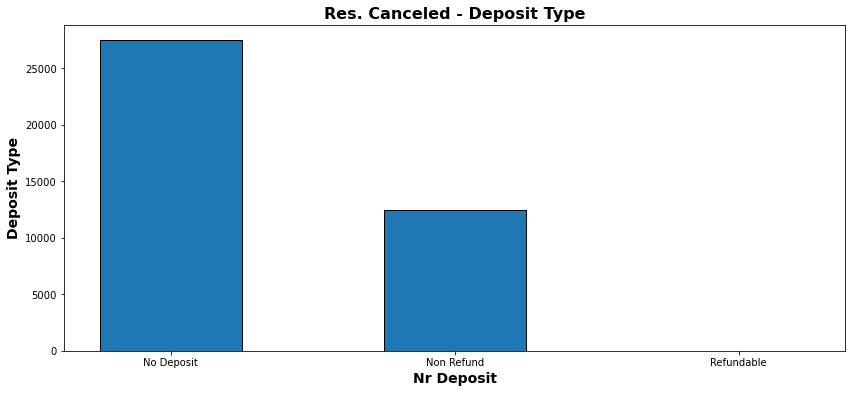

In [223]:
#deposit_type


fig, ax = plt.subplots(figsize =(14, 6))

plt.xlabel('Nr Deposit', fontweight ='bold', fontsize = 14)
plt.ylabel('Deposit Type', fontweight='bold', fontsize = 14)
plt.title('Res. Canceled - Deposit Type',fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(deposit_typeDFB.index, deposit_typeDFB['deposit_type'], width=0.5, bottom=None, edgecolor= 'black' ,align='center', data=None)



In [224]:
#TOP 10 - previous_cancellations Reservas Canceladas


#valores dos top 10 market_segment
previous_cancellations = df[df.is_canceled == 1].previous_cancellations.value_counts().head(10)[:]
#nomes dos top 10 
previous_cancellationsIndex = df[df.is_canceled == 1].previous_cancellations.value_counts().head(10).keys()

# TOP 10 market_segment
previous_cancellationsDFB = pd.DataFrame({'previous_cancellations': previous_cancellations,
              'previous_cancellations%': round((previous_cancellations / len(df[df.is_canceled == 1].index) * 100), 2)}, index=previous_cancellationsIndex)

#df
previous_cancellationsDFB


,previous_cancellations,previous_cancellations%
0,34499,86.36
1,5324,13.33
26,26,0.07
25,25,0.06
24,24,0.06
2,18,0.05
14,14,0.04
3,8,0.02
6,6,0.02
13,4,0.01


In [98]:
df[df.previous_cancellations == 1].is_canceled.value_counts()



1.0    5325
0.0      28
Name: is_canceled, dtype: int64

In [99]:
df[df.previous_cancellations == 2].is_canceled.value_counts()

1.0    18
0.0    12
Name: is_canceled, dtype: int64

In [100]:
df[df.previous_cancellations == 3].is_canceled.value_counts()

1.0    8
0.0    1
Name: is_canceled, dtype: int64

In [101]:
df[df.previous_cancellations == 6].is_canceled.value_counts()

1.0    6
Name: is_canceled, dtype: int64

<AxesSubplot:>

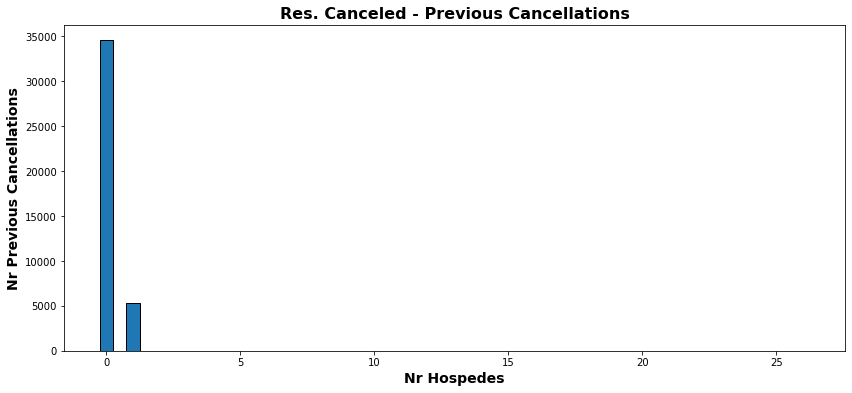

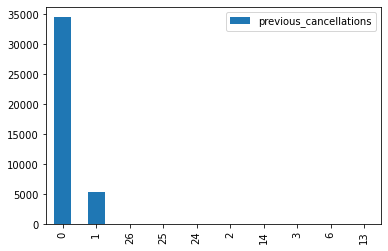

In [163]:
#mprevious_cancellations
fig, ax = plt.subplots(figsize =(14, 6))

plt.xlabel('Nr Hospedes', fontweight ='bold', fontsize = 14)
plt.ylabel('Nr Previous Cancellations', fontweight='bold', fontsize = 14)
plt.title('Res. Canceled - Previous Cancellations' ,fontweight ='bold', fontsize=16, loc='center', pad=None)

plt.bar(previous_cancellationsDFB.index, previous_cancellationsDFB['previous_cancellations'], width=0.5, bottom=None, edgecolor= 'black' ,align='center', data=None)

#mprevious_cancellations

previous_cancellationsDFB.plot.bar(y='previous_cancellations')

#Criar Dummies

In [161]:
#Observar as variaveis object antes de criar dummies
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101479 entries, 3 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           101479 non-null  object 
 1   is_canceled                     101479 non-null  float64
 2   lead_time                       101479 non-null  int64  
 3   arrival_date_year               101479 non-null  int64  
 4   arrival_date_month              101479 non-null  object 
 5   arrival_date_week_number        101479 non-null  int64  
 6   arrival_date_day_of_month       101479 non-null  int64  
 7   stays_in_weekend_nights         101479 non-null  int64  
 8   stays_in_week_nights            101479 non-null  int64  
 9   adults                          101479 non-null  int64  
 10  children                        101479 non-null  float64
 11  babies                          101479 non-null  int64  
 12  meal            

In [162]:
#Observar variavel reservation_status_date
df[df.reservation_status == 'Canceled'][['reservation_status','reservation_status_date']]

,reservation_status,reservation_status_date
8,Canceled,2015-05-06
9,Canceled,2015-04-22
10,Canceled,2015-06-23
27,Canceled,2015-05-11
34,Canceled,2015-05-19
...,...,...
82945,Canceled,2016-01-07
85006,Canceled,2016-03-07
87647,Canceled,2016-05-06
91692,Canceled,2016-06-24


In [227]:
#eliminar coluna reservation_status_date
df = df.drop(columns=['reservation_status_date'])

In [228]:
df = pd.get_dummies(df, columns=['hotel','arrival_date_month',"meal",'country','market_segment',"distribution_channel",'reserved_room_type','assigned_room_type','deposit_type', 'customer_type', 'reservation_status'], prefix=['hotel','arrival_date_month',"meal",'country','market_segment',"distribution_channel",'reserved_room_type','assigned_room_type','deposit_type', 'customer_type', 'reservation_status'])

In [229]:
#ter listagem do nome de todas as colunas
a = []
for column in df:
    a.append(str(column))
print(a)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'days_stayed', 'previous_cancel_Discretization', 'hotel_City Hotel', 'hotel_Resort Hotel', 'arrival_date_month_April', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_ABW', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'c

DATA SELECTION

-Selecionar as melhores variaveis que explicam os cancelamentos

In [ ]:
listaCorr_23 = []

corr = df.corr()

for column in a:
    
    if corr['is_canceled'][column] >= 0.11 or corr['is_canceled'][column] <= -0.11:
        listaCorr_23.append(column)

print(listaCorr_23)


In [ ]:

#observar a correlação 

sns.set_theme(style="white")
corr = df[listaCorr_23].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [189]:
df[['is_canceled', 'lead_time', 'previous_cancellations', 'booking_changes']]

,is_canceled,lead_time,previous_cancellations,booking_changes
3,0.0,13,0,0
4,0.0,14,0,0
5,0.0,14,0,0
7,0.0,9,0,0
8,1.0,85,0,0
...,...,...,...,...
119384,0.0,21,0,0
119385,0.0,23,0,0
119386,0.0,102,0,0
119388,0.0,109,0,0


In [190]:
df.previous_cancellations.value_counts()

0     95967
1      5353
2        30
26       26
25       25
24       24
11       20
14       14
3         9
6         6
13        4
21        1
Name: previous_cancellations, dtype: int64

In [119]:
#entender a correlação entre previous_cancellations e is_canceled
df[df.previous_cancellations >= 1]['is_canceled'].value_counts()

1.0    5451
0.0      61
Name: is_canceled, dtype: int64

In [226]:
#Descaracterização da variavel previous_cancellations para biário

def previous_cancellationsDiscretization (row):
    if row['previous_cancellations'] == 0:
        return 0
    else:
        return 1


df['previous_cancel_Discretization'] = df.apply(previous_cancellationsDiscretization, axis = 1)

In [120]:
df.previous_cancel_Discretization.value_counts()

0    95967
1     5512
Name: previous_cancel_Discretization, dtype: int64

In [121]:
#Descaracterização da variavel lead_time para 5 intervalos

pd.qcut(df['lead_time'], 5)

3         (-0.001, 19.0]
4         (-0.001, 19.0]
5         (-0.001, 19.0]
7         (-0.001, 19.0]
8          (55.0, 110.0]
               ...      
119384      (19.0, 55.0]
119385      (19.0, 55.0]
119386     (55.0, 110.0]
119388     (55.0, 110.0]
119389    (192.0, 629.0]
Name: lead_time, Length: 101479, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 19.0] < (19.0, 55.0] < (55.0, 110.0] < (110.0, 192.0] < (192.0, 629.0]]

In [195]:
#ter listagem do nome de todas a nova coluna 'previous_cancel_Discretization'
a = []
for column in df:
    a.append(str(column))
print(a)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel', 'arrival_date_month_April', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_ABW', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'country_ARM', 'country_ASM', 'country_ATA', 'count

In [196]:
df.info(40)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101479 entries, 3 to 119389
Data columns (total 252 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    is_canceled                     float64
 1    lead_time                       int64  
 2    arrival_date_year               int64  
 3    arrival_date_week_number        int64  
 4    arrival_date_day_of_month       int64  
 5    stays_in_weekend_nights         int64  
 6    stays_in_week_nights            int64  
 7    adults                          int64  
 8    children                        float64
 9    babies                          int64  
 10   is_repeated_guest               int64  
 11   previous_cancellations          int64  
 12   previous_bookings_not_canceled  int64  
 13   booking_changes                 int64  
 14   agent                           float64
 15   days_in_waiting_list            int64  
 16   adr                             float64
 17   required

In [201]:
listaCorr_23 = []    #add 'previous_cancel_Discretization' e Group_ lead_timea correlação

corr = df.corr()

for column in a:
    
    if corr['is_canceled'][column] >= 0.20 or corr['is_canceled'][column] <= -0.20:
        listaCorr_23.append(column)

print(listaCorr_23)

['is_canceled', 'lead_time', 'total_of_special_requests', 'country_PRT', 'market_segment_Groups', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'reservation_status_Canceled', 'reservation_status_Check-Out', 'previous_cancel_Discretization']


<AxesSubplot:>

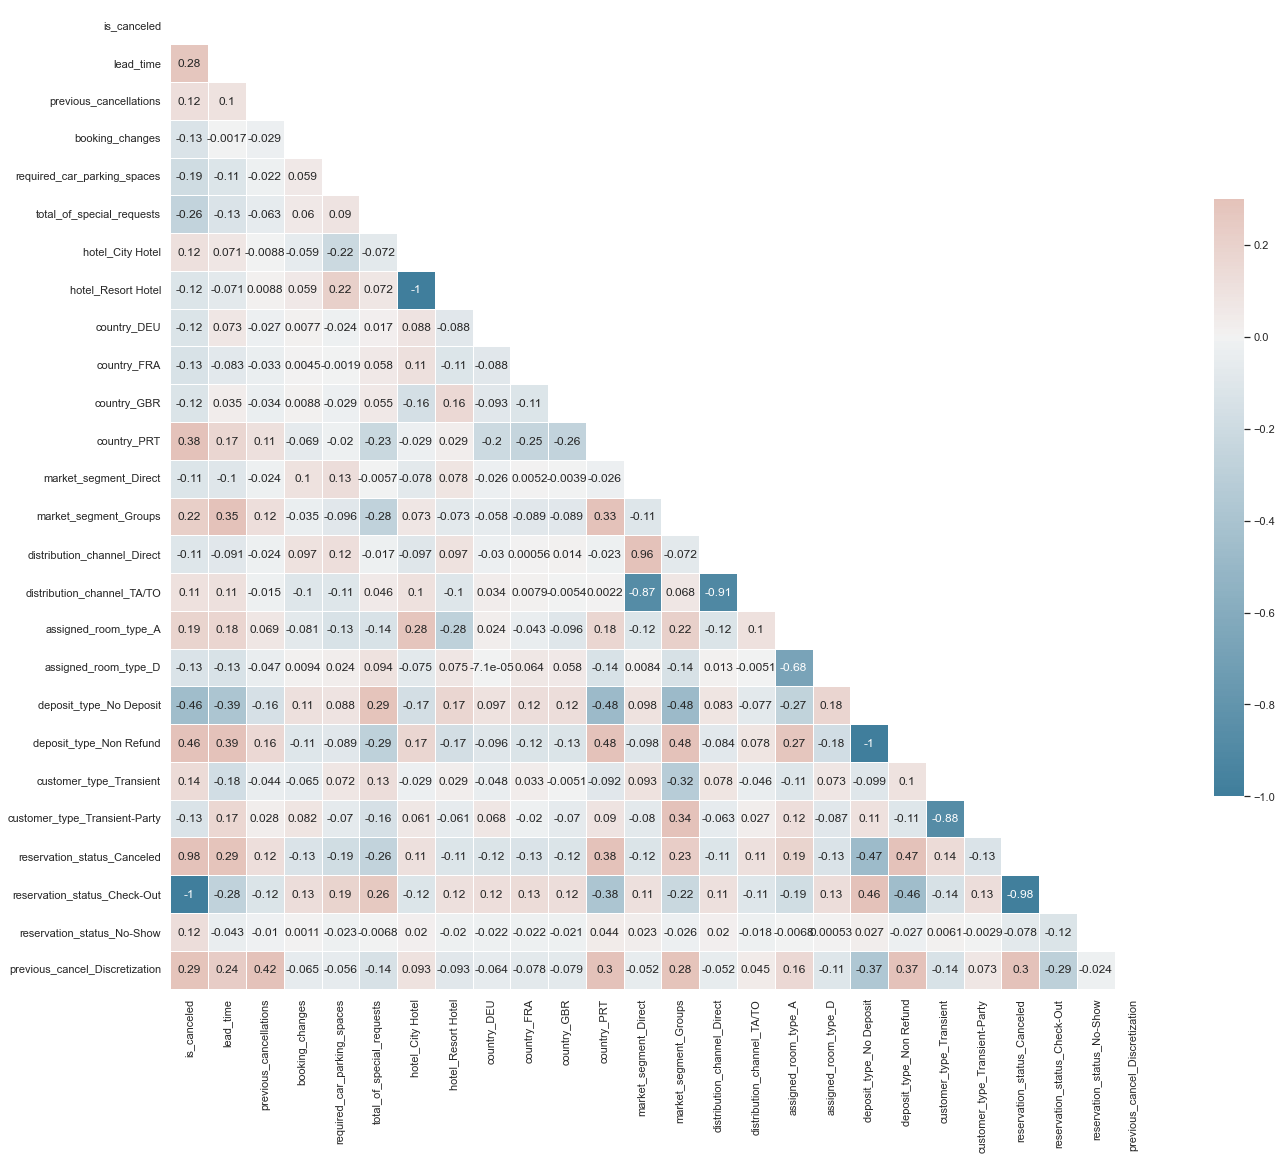

In [199]:
#observar a correlação com 'previous_cancel_Discretization'

sns.set_theme(style="white")
corr = df[listaCorr_23].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [200]:
print(df.columns.values)

['is_canceled' 'lead_time' 'arrival_date_year' 'arrival_date_week_number'
 'arrival_date_day_of_month' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'adults' 'children' 'babies' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'booking_changes' 'agent' 'days_in_waiting_list' 'adr'
 'required_car_parking_spaces' 'total_of_special_requests'
 'hotel_City Hotel' 'hotel_Resort Hotel' 'arrival_date_month_April'
 'arrival_date_month_August' 'arrival_date_month_December'
 'arrival_date_month_February' 'arrival_date_month_January'
 'arrival_date_month_July' 'arrival_date_month_June'
 'arrival_date_month_March' 'arrival_date_month_May'
 'arrival_date_month_November' 'arrival_date_month_October'
 'arrival_date_month_September' 'meal_BB' 'meal_FB' 'meal_HB' 'meal_SC'
 'meal_Undefined' 'country_ABW' 'country_AGO' 'country_AIA' 'country_ALB'
 'country_AND' 'country_ARE' 'country_ARG' 'country_ARM' 'country_ASM'
 'country_ATA' 'country_ATF' 'country_AUS' 'country_AU

# Algoritmos

In [241]:
#listagem com correlação > 0.11 e < -0.11 ,
#sem  reservation_status_Canceled, reservation_status_Check-Out, reservation_status_No-Show , 'previous_cancellations'
df_encoded1 = df[['is_canceled','lead_time', 'booking_changes', 'required_car_parking_spaces', 
                  'total_of_special_requests', 'hotel_City Hotel', 
                  'country_PRT', 'market_segment_Direct', 'market_segment_Groups',
                  'assigned_room_type_A', 'assigned_room_type_D', 'deposit_type_No Deposit', 'deposit_type_Non Refund',
                  'customer_type_Transient', 'customer_type_Transient-Party', 'previous_cancel_Discretization']]


#efetuado teste com variaveis com mais mais de 0.2 ou -0.2, resultados de algoritmos muito piores que o df_encoded1
#logo optámos por df_encoded1
df_encoded2 =df[['is_canceled','lead_time', 'total_of_special_requests', 'country_PRT', 'market_segment_Groups', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'previous_cancel_Discretization']]



In [242]:
#Let's split the data!
x = df_encoded1.drop(columns=['is_canceled'])
y = df_encoded1['is_canceled'] # define the target variable


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 50)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(81018, 15) (81018,)
(20255, 15) (20255,)


In [227]:
#Balancear o n
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)


scaler = MinMaxScaler()

x = scaler.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 50)



print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(98329, 15) (98329,)
(24583, 15) (24583,)


In [96]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_predLG = logreg.predict(X_test)

acc = accuracy_score(Y_test, Y_predLG)
acc

NameError: name 'X_train' is not defined

In [229]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_predS = svc.predict(X_test)
acc = accuracy_score(Y_test, Y_predS)
print('SVC')
print(classification_report(Y_test,Y_predS))
print(confusion_matrix(Y_test,Y_predS))

SVC
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76     12216
         1.0       0.77      0.75      0.76     12367

    accuracy                           0.76     24583
   macro avg       0.76      0.76      0.76     24583
weighted avg       0.76      0.76      0.76     24583

[[9464 2752]
 [3139 9228]]


In [230]:
# K Nearest Neighbours
for a in range(0,30,2):
    knn = KNeighborsClassifier(n_neighbors = a+1)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    print(acc)

0.7765935809299109
0.7853394622299963
0.790261562868649
0.7917666680226173
0.7920107391286662
0.7932310946589106
0.7924582028230891
0.792051417646341
0.7913192043281942
0.7901395273156246
0.7903429199039987
0.7903429199039987
0.7890412073384045
0.7883089940202579
0.7881056014318838


In [231]:
# K Nearest Neighbours n 13 é o melhor 
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, Y_train)
Y_predK = knn.predict(X_test)
acc = accuracy_score(Y_test, Y_predK)
print('KNeighborsClassifier')
print(classification_report(Y_test,Y_predK))
print(confusion_matrix(Y_test,Y_predK))

KNeighborsClassifier
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79     12216
         1.0       0.80      0.79      0.79     12367

    accuracy                           0.79     24583
   macro avg       0.79      0.79      0.79     24583
weighted avg       0.79      0.79      0.79     24583

[[9757 2459]
 [2643 9724]]


In [232]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=95, criterion='gini', max_depth=17, min_samples_split=5, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                       max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                       n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                                       ccp_alpha=0.0, max_samples=None)
random_forest.fit(X_train, Y_train)
Y_predF = random_forest.predict(X_test)
print('RandomForestClassifier')
print(classification_report(Y_test,Y_predF))
print(confusion_matrix(Y_test,Y_predF))

RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80     12216
         1.0       0.81      0.78      0.80     12367

    accuracy                           0.80     24583
   macro avg       0.80      0.80      0.80     24583
weighted avg       0.80      0.80      0.80     24583

[[10013  2203]
 [ 2709  9658]]


In [244]:
# Naive Bayes
gnb = GaussianNB()
Y_predG = gnb.fit(X_train, Y_train).predict(X_test)
print('GaussianNB')
print(classification_report(Y_test,Y_predG))
print(confusion_matrix(Y_test,Y_predG))

GaussianNB
              precision    recall  f1-score   support

         0.0       0.71      0.99      0.83     12361
         1.0       0.94      0.38      0.54      7894

    accuracy                           0.75     20255
   macro avg       0.83      0.68      0.68     20255
weighted avg       0.80      0.75      0.71     20255

[[12184   177]
 [ 4923  2971]]
